Early data was collected by technicians using mercury thermometers, where any variation in the visit time impacted measurements. In the 1940s, the construction of airports caused many weather stations to be moved. In the 1980s, there was a move to electronic thermometers that are said to have a cooling bias.

Given this complexity, there are a range of organizations that collate climate trends data. The three most cited land and ocean temperature data sets are NOAA’s MLOST, NASA’s GISTEMP and the UK’s HadCrut.

We have repackaged the data from a newer compilation put together by the Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.

In [1]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style("darkgrid")

## Selecting a real world dataset 
#### Try to remeber this qualites while selecting the dataset:
- If you want to showcase the project, make sure the project has a huge amount of data.
- Always prefer choosing the real world dataset, for better understanding and taking decisions
- After choosing the dataset dont rush and draw graphs, give time to understand every column and it purpose.
- Most of the time we got unfiltered data so filter out the unnecery columns and rows which will not going to impact.

### 1. Reading the CSV file

In [ ]:
# If you want to use urlretrive method to download the dataset, you can use following syntax:
# from urllib.request import urlretrieve
# ds = urlretrieve(" paste the url of dataset ", "filename.csv")

In [2]:
df= pd.read_csv("GlobalLandTemperaturesByCity.csv")

### 2. The shape of the dataset:

In [3]:
shape = df.shape
shape

(8599212, 7)

### 3. Columns and the type

In [ ]:
columns = df.columns
columns

unique_columns_df= list(df.columns) # ['dt','AverageTemperature','AverageTemperatureUncertainty','City','Country','Latitude','Longitude']
length_of_unique_columns_df =len(unique_columns_df) # 7
df.info()

#### Notes:
- The temperature dataset contains 8.5 million data
- We have 7 types of data for each row, from this we will analyse 1. Date 2. Avarage Tempareture 3. City   4. Country 5. Latitude

## Perform data preparetion and data cleaning 
#### Here what we cleaned and Why?
- The Average Temperature Uncertainty, Longitude column is not going to help us anyway, so we are discarding it.
- The NaN and 0 values

##### Tasks:
- Eliminate NaN values from AverageTemperature
- Discard Column 1) AverageTemparatureUncertanity 2) Longitude
- Divide the data in mounth and year

In [4]:
df.sample(20)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4100787,1863-02-01,22.338,2.905,Lages,Brazil,28.13S,50.00W
6280248,1858-11-01,4.791,1.041,Ravenna,Italy,44.20N,11.18E
4752272,2011-01-01,23.072,0.452,Meiktila,Burma,20.09N,95.55E
5191517,1955-09-01,14.298,0.153,Neuss,Germany,50.63N,6.34E
5822380,1850-05-01,10.446,0.889,Peterborough,United Kingdom,52.24N,0.00W
2375399,1841-11-01,11.954,1.474,Fort Worth,United States,32.95N,96.70W
5162776,1942-09-01,17.072,0.175,Nazran,Russia,44.20N,44.72E
4196742,1950-02-01,26.039,0.371,Legaspi,Philippines,13.66N,123.03E
6391494,1825-06-01,19.839,0.962,Rochester,United States,42.59N,78.55W
1325866,1927-08-01,17.440,0.274,Cambridge,United States,42.59N,72.00W


##### 1) Droping the column 1)AverageTemperatureUncertainty 

In [5]:
columns_to_drop = ['AverageTemperatureUncertainty']
df.drop(columns=columns_to_drop, inplace=True)  # In this way we can drop multiple columns in-place

In [6]:
df.sample(20)

,dt,AverageTemperature,City,Country,Latitude,Longitude
5559585,1987-01-01,-18.828,Oulu,Finland,65.09N,24.89E
7866059,1810-11-01,NaN,Ujjain,India,23.31N,76.02E
3054127,1988-11-01,23.753,Hubli,India,15.27N,75.83E
2559920,1896-10-01,26.662,Ghaziabad,India,28.13N,77.27E
6439894,1892-04-01,15.242,Ruian,China,28.13N,120.91E
3934515,1838-02-01,-23.357,Komsomolsk Na Amure,Russia,50.63N,138.17E
5854726,1888-07-01,32.811,Phoenix,United States,32.95N,112.02W
4796154,1866-03-01,16.035,Mexico,Mexico,20.09N,98.96W
7072447,1784-11-01,5.034,Sochi,Russia,44.20N,40.25E
3387695,1989-08-01,29.501,Jaunpur,India,26.52N,82.39E


##### 2) Droping the rows NaN values from AverageTemperature

In [7]:
df = df.dropna(subset=['AverageTemperature'])

#### 3) Checking is there any null value present

In [8]:
df.isna().sample(20)

,dt,AverageTemperature,City,Country,Latitude,Longitude
6427997,False,False,False,False,False,False
3821831,False,False,False,False,False,False
243719,False,False,False,False,False,False
1205184,False,False,False,False,False,False
2721781,False,False,False,False,False,False
7497565,False,False,False,False,False,False
6482362,False,False,False,False,False,False
2043664,False,False,False,False,False,False
5061533,False,False,False,False,False,False
3057117,False,False,False,False,False,False


#### 4) Convering the type of Date from object to datetime and adding the mount and year column

In [9]:
df.dt = pd.to_datetime(df.dt)

##### 4.1) Adding columns

In [10]:
df["Year"] = pd.DatetimeIndex(df.dt).year
df["Month"] = pd.DatetimeIndex(df.dt).month

In [11]:
df.sample(20)

,dt,AverageTemperature,City,Country,Latitude,Longitude,Year,Month
4506297,1992-06-01,27.256,Madurai,India,10.45N,77.73E,1992,6
967977,1799-09-01,25.421,Biratnagar,Nepal,26.52N,87.76E,1799,9
3716731,1780-08-01,18.010,Kayseri,Turkey,39.38N,35.38E,1780,8
6286075,1958-02-01,25.019,Rawang,Malaysia,4.02N,102.05E,1958,2
588842,1979-08-01,27.335,Balikpapan,Indonesia,0.80S,116.52E,1979,8
649854,2002-11-01,22.099,Bankura,India,23.31N,86.50E,2002,11
8063098,1922-02-01,4.640,Viransehir,Turkey,37.78N,40.68E,1922,2
7600389,1937-11-01,4.178,Tianjin,China,39.38N,116.53E,1937,11
7143582,1860-04-01,12.798,Springfield,United States,39.38N,89.48W,1860,4
2532869,1902-11-01,3.283,Gelsenkirchen,Germany,52.24N,7.88E,1902,11


## Perform exploratory analysis and visualization

##### Notes:
- Highest city number: 391 (India)
- Only 7 countries with more than 100 cities (India,China,United States,Brazil,Japan,Russia,Indonesia)
- Number of country with less than 10 City: 111 (including UAE,Ghana, Soudi Arabia etc.)
> The trend says that there are many country with less City, so we have set the bar of filtering out by city to low: We Will discard those country whose city size < 3. 

#### 1) Calculating the unique country in whole dataset
- We have 159 country in this data set

In [12]:
unique_country_series = df.Country.unique()
# country_length = len(df.Country.unique()) # 159

#### 2) Calculating City per unique country

In [13]:
country_city_length_dict = {}
for country in unique_country_series:
    length_of_unique_city = len(df[df.Country == country]["City"].unique())
    country_city_length_dict[country] = length_of_unique_city
    
    
data = {"Country": list(country_city_length_dict.keys()), "City_Count": list(country_city_length_dict.values())}
countrywise_city_length_df = pd.DataFrame(data)

In [14]:
countrywise_city_length_df

,Country,City_Count
0,Denmark,4
1,Turkey,51
2,Kazakhstan,15
3,China,371
4,Spain,50
...,...,...
154,Estonia,2
155,Georgia,1
156,Mongolia,1
157,Laos,1


#### 3) Country with more than 3 city

In [15]:
threshold = 3
country_with_more_than_3_city = countrywise_city_length_df[countrywise_city_length_df.City_Count > threshold]
country_with_more_than_3_city

,Country,City_Count
0,Denmark,4
1,Turkey,51
2,Kazakhstan,15
3,China,371
4,Spain,50
...,...,...
113,Sweden,5
116,Austria,5
119,Dominican Republic,9
122,Sudan,10


#### 4) List of 20 country with city_count in descending order 

In [16]:
top_20_country_desc = countrywise_city_length_df.sort_values(by= "City_Count", ascending=False).head(20)

In [17]:
top_20_country_desc

,Country,City_Count
15,India,391
3,China,371
14,United States,248
30,Brazil,220
13,Japan,175
8,Russia,156
24,Indonesia,143
18,Mexico,97
6,Nigeria,91
5,Germany,81


#### 5) Top 5 city for more clear visualization

In [18]:
top_5_country_desc = countrywise_city_length_df.sort_values(by= "City_Count", ascending=False).head(5)

In [19]:
top_5_country_desc

,Country,City_Count
15,India,391
3,China,371
14,United States,248
30,Brazil,220
13,Japan,175


#### 6) Top 5 country with min number of cities

In [20]:
country_with_more_than_3_city.tail()

,Country,City_Count
113,Sweden,5
116,Austria,5
119,Dominican Republic,9
122,Sudan,10
123,Lithuania,5


In [21]:
top_5_country_aesc = country_with_more_than_3_city.sort_values(by= "City_Count", ascending=True).head(5)

In [22]:
top_5_country_aesc

,Country,City_Count
0,Denmark,4
59,Iraq,4
102,Guinea,4
97,Nicaragua,4
78,Norway,4


#### 4) Country with less than 10 cities

In [23]:
country_with_less_than_10_city = (countrywise_city_length_df[countrywise_city_length_df.City_Count < 10])
country_with_less_than_10_city

,Country,City_Count
0,Denmark,4
12,Saudi Arabia,7
16,Benin,6
17,United Arab Emirates,3
20,Ghana,9
...,...,...
154,Estonia,2
155,Georgia,1
156,Mongolia,1
157,Laos,1


##### Note : The dataset is too big so doing the average of temperature and anlysing it with other city is worthless. Like  if we average the temp. then we will lost the reason of collect the data for every mounth. So we have to peak country and corresponding city.           

#### 5) Calculating the average temperature

In [24]:
average_yearly_temperature = df.groupby(['Country', 'Year'])['AverageTemperature'].mean()
average_yearly_temperature

Country      Year
Afghanistan  1833    13.091150
             1834    13.093600
             1835    13.959233
             1837    13.914846
             1838    14.251397
                       ...    
Zimbabwe     2009    20.106405
             2010    20.741714
             2011    20.366060
             2012    20.218274
             2013    19.404661
Name: AverageTemperature, Length: 31556, dtype: float64

In [25]:
average_yearly_temperature = average_yearly_temperature.reset_index()
average_yearly_temperature

,Country,Year,AverageTemperature
0,Afghanistan,1833,13.091150
1,Afghanistan,1834,13.093600
2,Afghanistan,1835,13.959233
3,Afghanistan,1837,13.914846
4,Afghanistan,1838,14.251397
...,...,...,...
31551,Zimbabwe,2009,20.106405
31552,Zimbabwe,2010,20.741714
31553,Zimbabwe,2011,20.366060
31554,Zimbabwe,2012,20.218274


#### We are only going to see the visualization for top 5 country with max number of cities

In [26]:
filtered_data1 = average_yearly_temperature[average_yearly_temperature['Country'].isin(top_5_country_desc['Country'])]

In [27]:
filtered_data1

,Country,Year,AverageTemperature
3774,Brazil,1824,26.478477
3775,Brazil,1825,26.489417
3776,Brazil,1826,26.397675
3777,Brazil,1827,26.743477
3778,Brazil,1828,26.119273
...,...,...,...
30367,United States,2009,14.803492
30368,United States,2010,14.883878
30369,United States,2011,15.101007
30370,United States,2012,15.959264


#### Visualization for top 5 country with min number of cities

In [35]:
filtered_data2 = average_yearly_temperature[average_yearly_temperature['Country'].isin(top_5_country_aesc['Country'])]

In [37]:
filtered_data2

,Country,Year,AverageTemperature
7723,Denmark,1743,6.221000
7724,Denmark,1744,9.147000
7725,Denmark,1745,0.060125
7726,Denmark,1750,8.808818
7727,Denmark,1751,8.188125
...,...,...,...
21182,Norway,2009,4.781042
21183,Norway,2010,2.777042
21184,Norway,2011,5.279083
21185,Norway,2012,4.165229


#### Visualization

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
plt.figure(figsize=(10, 6));

<Figure size 1000x600 with 0 Axes>

##### 1) Average Temperature Over Years for top 5 Country with most City_Count

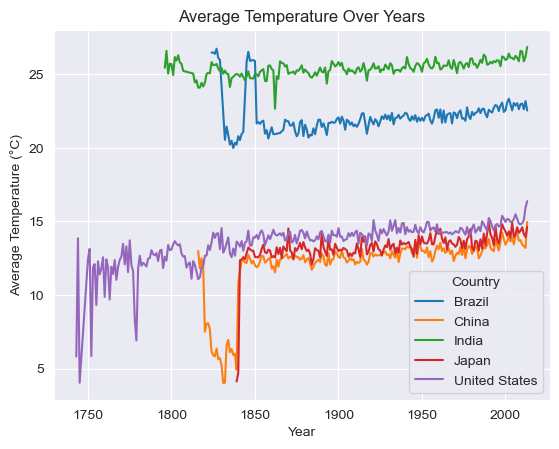

In [32]:
sns.lineplot(x='Year', y='AverageTemperature',hue='Country',data = filtered_data1 )
plt.title("Average Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.show()

# Adding legend
#plt.legend(title="Country", loc="upper left", bbox_to_anchor=(1, 1))


#### 2)  Average Temperature Over Years for top 5 Country with min City_Count

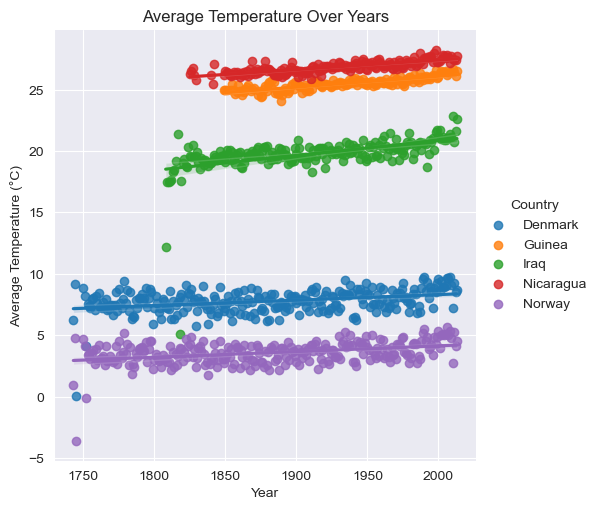

In [33]:
sns.lmplot(x='Year', y='AverageTemperature',hue='Country',data = filtered_data2 )
plt.title("Average Temperature Over Years")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.show()

#### 3) Max temperature in which location?

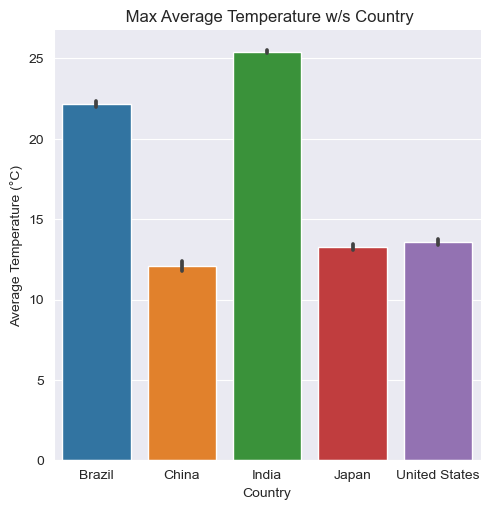

In [34]:
sns.catplot(x='Country', y='AverageTemperature',data = filtered_data1, kind="bar")
plt.title(" Max Average Temperature w/s Country")
plt.xlabel("Country")
plt.ylabel("Average Temperature (°C)")
plt.show()

## Ask question and answer those to get valuable insights
1) What is the relationship of temperature with respest to time?
2) How the temperature varries with time?
3) Max/min temperature in which location?
4) The future trend of temperature?
5) Is there any abnormality you noticed in temperature location wise? (like high lattitude but you can see the temp rise in those region)

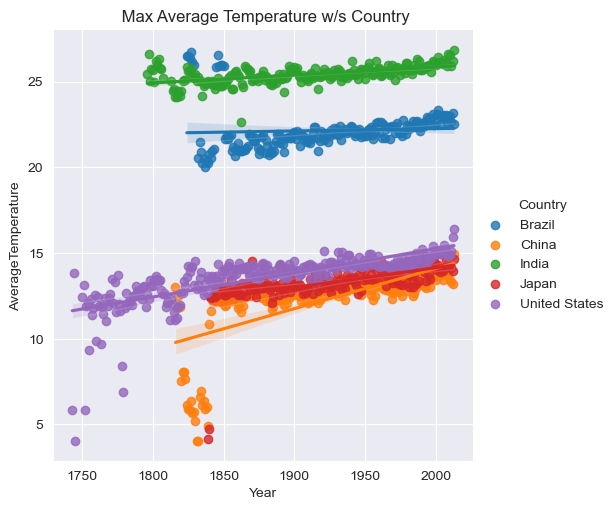

In [70]:
sns.lmplot(x='Year', y='AverageTemperature',hue='Country',data = filtered_data1 )
plt.title(" Max Average Temperature w/s Country")

plt.show()

 ### 1) What is the relationship of temperature with respest to time?


**Analytical Answer:**

Analyzing temperature data from 1750 to 2021 would involve several key aspects:

1. **Long-Term Temperature Trends:** One of the most prominent findings would be the identification of long-term temperature trends. It is widely accepted in climate science that global temperatures have increased over this time period, with the most significant warming observed in the past century. This warming trend is commonly associated with anthropogenic factors, such as the burning of fossil fuels and deforestation, which have led to increased greenhouse gas concentrations in the atmosphere.

2. **Variability:** While the overall trend is warming, there would also be periods of temperature variability. Natural climate phenomena, such as volcanic eruptions, solar cycles, and ocean-atmosphere interactions (e.g., El Niño/La Niña), can lead to short-term temperature fluctuations.

3. **Regional Variations:** Temperature changes are not uniform across the globe. Some regions may experience more significant warming than others. Studying regional variations helps identify areas that are particularly vulnerable to climate change impacts, such as rising sea levels, extreme weather events, and shifts in ecosystems.

4. **Implications:** Analyzing the data would highlight the implications of temperature changes. This includes the melting of glaciers and polar ice caps, sea-level rise, shifts in ecosystems and biodiversity, changes in precipitation patterns, and the increased frequency of extreme weather events.

5. **Mitigation and Adaptation:** The analysis would underscore the importance of mitigation efforts to reduce greenhouse gas emissions and slow down the rate of warming. It would also emphasize the need for adaptation strategies to cope with the impacts of climate change that are already occurring.

It's crucial to emphasize that climate analysis requires access to comprehensive and up-to-date climate datasets, sophisticated statistical methods, and expertise in climate science. The actual analysis would involve working with observational data, climate models, and a deep understanding of the Earth's climate system. 

### 2) How the temperature varries with time?

To understand how temperature changes with time, we can break it down into different temporal scales:

1. **Diurnal Variation:** Temperature varies on a daily cycle, rising during the day and falling at night. This diurnal variation is primarily driven by the Earth's rotation and the angle at which sunlight strikes the surface.

2. **Seasonal Variation:** On a yearly timescale, temperature varies with the changing seasons. This variation is due to the tilt of the Earth's axis and its orbit around the Sun. In most regions, temperatures are warmer in the summer and colder in the winter.

3. **Short-Term Weather Patterns:** Temperature can fluctuate over days or weeks due to weather patterns. These fluctuations are influenced by factors such as air masses, pressure systems, and the movement of weather fronts.

4. **Long-Term Trends:** Over decades and centuries, temperature can exhibit long-term trends. For example, the Earth has experienced a significant warming trend over the past century, primarily attributed to human activities such as the burning of fossil fuels, deforestation, and the release of greenhouse gases.

6. **Geological Time Scales:** Over geological time scales (millions of years), temperature has varied significantly due to natural factors such as plate tectonics, volcanic activity, and changes in the composition of the Earth's atmosphere. These changes have played a role in shaping the planet's climate history.



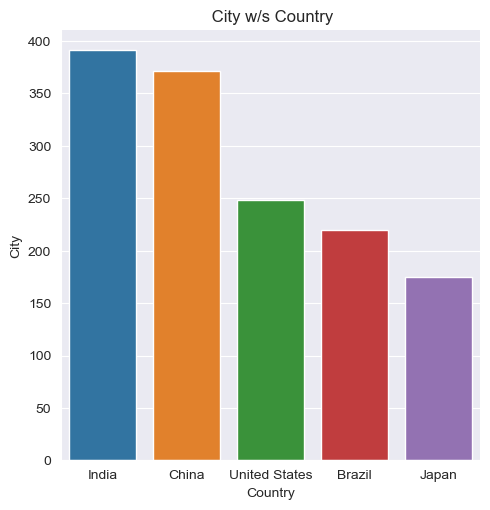

In [56]:

sns.catplot(x='Country', y='City_Count',data = top_5_country_desc, kind="bar")
plt.title(" City w/s Country")
plt.xlabel("Country")
plt.ylabel("City")
plt.show()

### 3) Max/min temperature in which location?

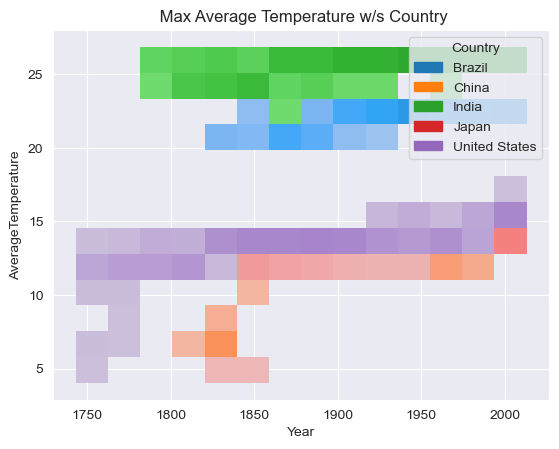

In [71]:
sns.histplot(data=filtered_data1, x='Year', y='AverageTemperature', hue="Country",multiple="stack")
plt.title(" Max Average Temperature w/s Country")
plt.show()

### 4) The future trend of temperature?

- Continued Warming: Regardless of emissions scenarios, graphs consistently project a continuation of rise of temperature over the 21st century. The degree of warming depends on future emissions.

- Regional Variations: Temperature changes will not be uniform across the globe. Some regions may experience more significant warming than others.

- Extreme Events: Models project an increase in the frequency and intensity of extreme weather events, such as heatwaves, hurricanes, and heavy precipitation events.

- Sea-Level Rise: Rising temperatures contribute to the melting of ice caps and glaciers, causing sea levels to rise. This poses risks to coastal communities.

- Impact on Ecosystems: Temperature changes can disrupt ecosystems, affecting biodiversity and the distribution of species.

## Conclusion

In conclusion, the relationship between temperature and time is a critical aspect of climate science and meteorology. Understanding temperature variations across different time scales is essential for predicting future climate trends and assessing the impacts of climate change. Climate models help scientists make projections about future temperature trends, emphasizing the need for both mitigation and adaptation strategies to address the challenges posed by a warming world.